# Predicting heart disease using machine learning

## Preparing the tools


* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation

In [122]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


## Load data


In [126]:
df = pd.read_csv("heart-disease.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
df.shape #rows,columns

(303, 14)

## Data exploration(expolatory data analysis or EDA)

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [49]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

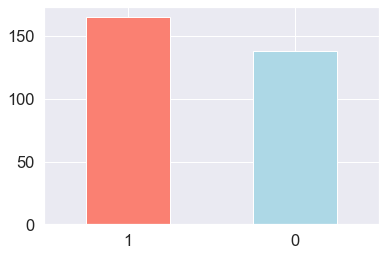

In [54]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])
plt.xticks(rotation=0)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [56]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [57]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequancy according to Sex

In [58]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [68]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


## Making our crosstab visual

<AxesSubplot:>

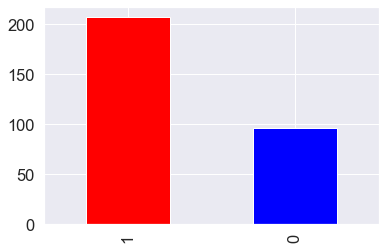

In [59]:
df.sex.value_counts().plot(kind="bar",color=["red","blue"])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

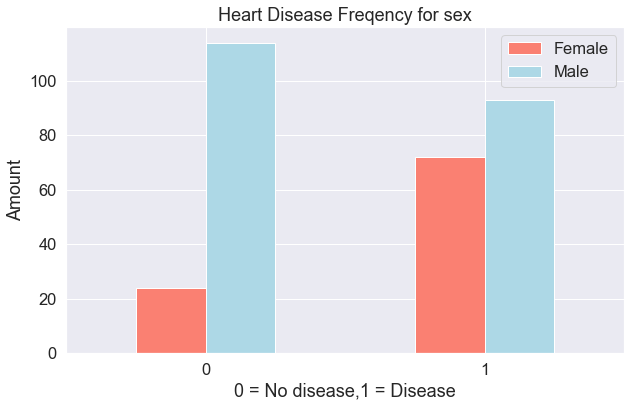

In [61]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",color=["salmon","lightblue"],figsize=(10,6))
plt.title("Heart Disease Freqency for sex")
plt.xlabel("0 = No disease,1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

## Age vs Max Heart rate for Heart Disease

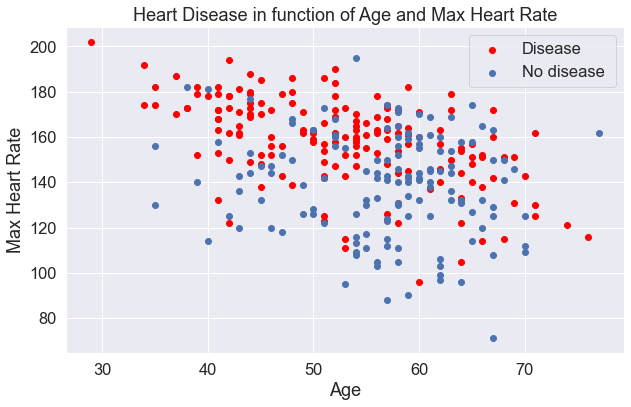

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(df["age"][df.target==1],df["thalach"][df.target==1],c="red")

plt.scatter(df.age[df.target==0],df.thalach[df.target==0])

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No disease "])

## Histogram

<AxesSubplot:ylabel='Frequency'>

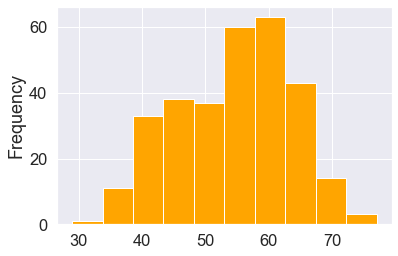

In [64]:
df.age.plot.hist(color='orange')

### Heart Disease Frequency per Chest Pain Type

In [65]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

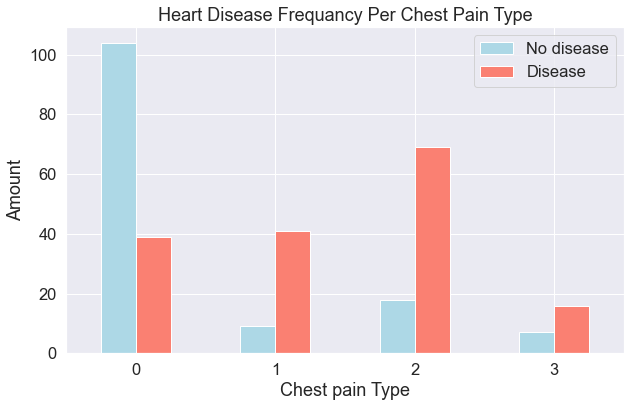

In [70]:

pd.crosstab(df.cp,df.target).plot(kind = "bar",figsize=(10,6),color=["lightblue","salmon"])
plt.title("Heart Disease Frequancy Per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0)

## Correlation between independent variables

In [71]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\jakub\AppData\Local\Temp\ipykernel_5228\3643695028.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


## Seaborn Heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trestbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalach'),
  Text(0, 8.5, 'exang'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slope'),
  Text(0, 11.5, 'ca'),
  Text(0, 12.5, 'thal'),
  Text(0, 13.5, 'target')])

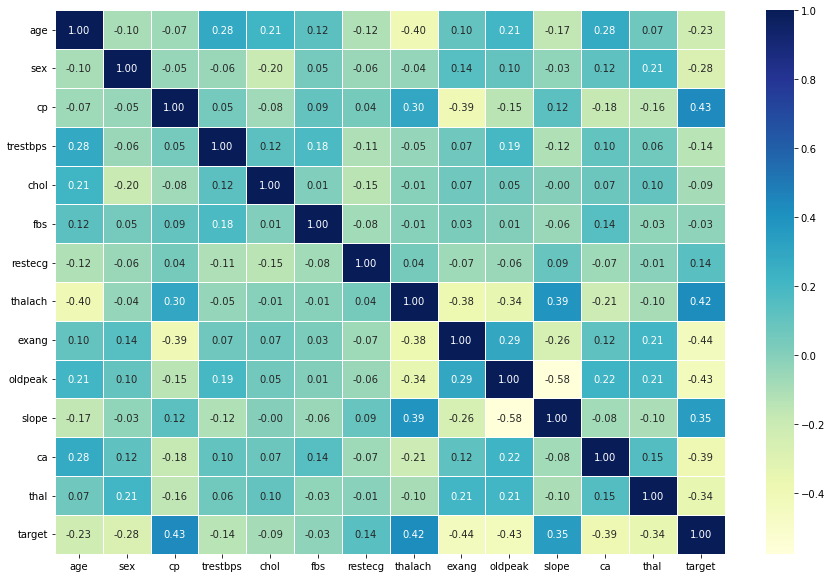

In [58]:
#Seaborn Heatmap
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu")
plt.yticks(rotation=0)

## Modelling

In [6]:
#split data into X and y
X = df.drop("target",axis=1)
y=df["target"]

## Training and test split

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Model choices

1. Logistic Regression
2. K - Nearest Neighbours Classifier
3. Random forest Classifier


In [88]:
models ={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [89]:
model_scores = fit_and_score(models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8032786885245902}

### Model Comparison

<AxesSubplot:>

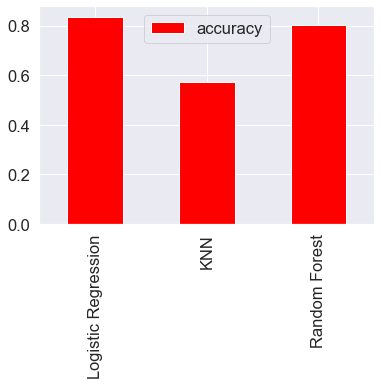

In [91]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar(color="red")

* Hyperparameter tuning
* Feature importance
* confusion matrix
* cross-validation
* precision
* Recall
* F1 score
* Classification report
* ROC currve
* Area under the curve (AUC)

## Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [92]:
train_scores = []
test_scores = []
neighbors = range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Maximum KNN score on the test data:68.85%


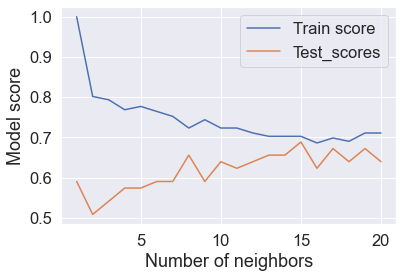

In [93]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test_scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

### Tuning models with with RandomizedSearchCV

* LogisticRegression()
* RandomForestClassifier()


In [94]:
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]
               }
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [95]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)
rs_log_reg.score(X_test,y_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8360655737704918

In [96]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [97]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_train,y_train)
rs_rf.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.819672131147541

In [98]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

## Tuning a model with GridSearchCV

In [99]:
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)
gs_log_reg.score(X_test,y_test)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8360655737704918

In [100]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

## Evaluating a classification model, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report 
* Precision
* Recall
* F1-score

In [101]:
y_preds=gs_log_reg.predict(X_test) 
y_preds


array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

## ROC Curve and AUC Scores

C:\Users\jakub\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


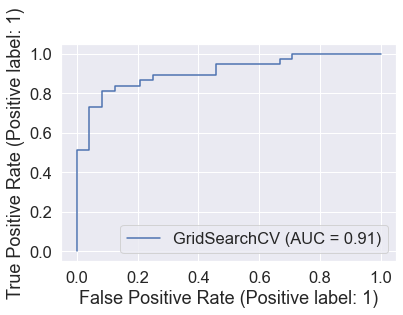

In [102]:
plot_roc_curve(gs_log_reg,X_test,y_test)

## Confusion matrix

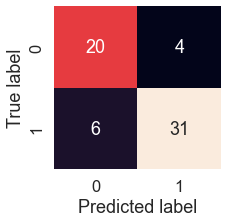

In [103]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fix,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
plot_conf_mat(y_test,y_preds)

## Classification report

In [104]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.89      0.84      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



### Calculate evaluation metrics using cross-validation

In [106]:
gs_log_reg.best_params_


{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [107]:
clf = LogisticRegression(C=0.7278953843983146,solver="liblinear")

In [108]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8182513661202186

In [109]:
#Cross-validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8138514802551555

In [110]:
#Cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8727272727272727

In [111]:
#Cross-validated f1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8408267145594746

In [121]:
cv_metrices = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "f1":cv_f1},index=[0])
cv_metrices

,Accuracy,Precision,Recall,f1
0,0.818251,0.813851,0.872727,0.840827


<AxesSubplot:title={'center':'Cross-validated classsification metrics'}>

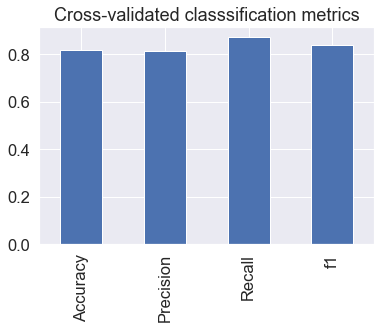

In [113]:
cv_metrices.T.plot.bar(title="Cross-validated classsification metrics",legend=False)

### Feature Importance

In [114]:
gs_log_reg.best_params_


{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [115]:
clf = LogisticRegression(C=0.7278953843983146,solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.7278953843983146, solver='liblinear')

In [116]:
np.mean(clf.coef_)

-0.15905393939544954

In [117]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.006923547699775175,
 'sex': -1.4428060919086108,
 'cp': 0.8695852838115385,
 'trestbps': -0.016888257778081905,
 'chol': -0.003713822731483173,
 'fbs': 0.14799703178039986,
 'restecg': 0.3806612573216976,
 'thalach': 0.03150089020215017,
 'exang': -0.6243479548482354,
 'oldpeak': -0.5000832437450717,
 'slope': 0.5706054313122454,
 'ca': -0.8131490012675039,
 'thal': -0.6739862819896638}

<AxesSubplot:title={'center':'Feature Importance'}>

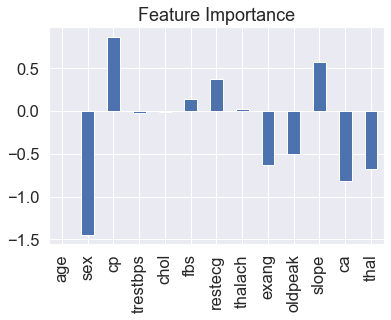

In [118]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [119]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [120]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
